# Chargement du modèle entrainé

In [2]:
from tensorflow.keras.models import model_from_json

with open('model_MNIST.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("parametres.h5")

# Importation des modules Python pour traiter les images

In [1]:
from skimage import io, transform
import matplotlib.pyplot as plt

# Lecture des images

Format original de l'image (64, 43, 4)


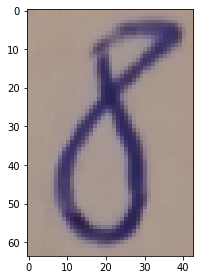

In [6]:
rgb = io.imread('8.png')
print(f'Format original de l\'image {rgb.shape}')
io.imshow(rgb)

# Conversion de l'image en N&B

![ConversionGrayScale](../Images/GrayScaleConversion.png "ConversionNB")

In [ ]:
rgb

In [9]:
import numpy as np

Format de l'image en N&B (64, 43)


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


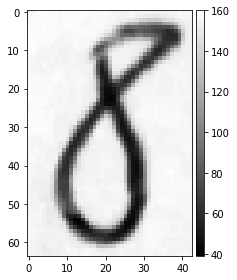

In [11]:
gray = np.dot(rgb[...,:], [0.299, 0.587, 0.114, 0])
print(f'Format de l\'image en N&B {gray.shape}')
io.imshow(gray, cmap='gray')

# Redimensionner l'image en 28x28px

Format de l'image redimensionnée (28, 28)


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


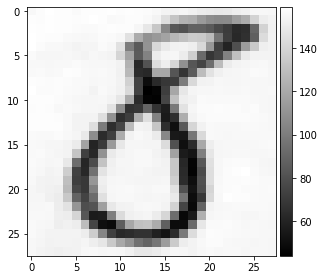

In [12]:
gray28x28 = transform.resize(gray, (28, 28))
print(f'Format de l\'image redimensionnée {gray28x28.shape}')
io.imshow(gray28x28, cmap='gray')

# Filtrer le fond d'image

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


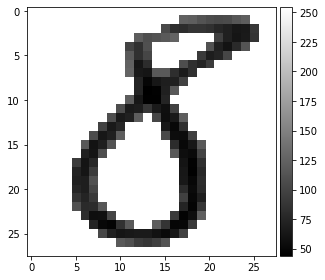

In [13]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
filtered = vectorized_filter(gray28x28)
io.imshow(filtered, cmap='gray')

# Inverser l'image et normaliser la valeur des pixels

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


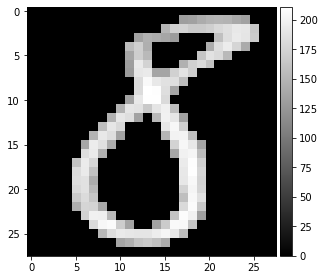

In [14]:
inverted = 255 - filtered
reshaped = inverted.reshape(28, 28, 1) / 255.0
batch = np.array([reshaped])
io.imshow(inverted, cmap='gray')

# Prédiction avec un modèle pré-entrainé

In [15]:
predictions = restored_model.predict(batch)
plus_probable = predictions.argmax(1)
plus_probable

array([5])

# Afficher les probabilités

In [ ]:

bar(range(10), predictions[0], tick_label=range(10))
plt.title('Valeurs prédites')
plt.show()

# Combiner le code précédent dans une fonction

In [ ]:
def prediction_chiffre(nom_fichier):
  # Lecture de l'image
  rgb = io.imread(nom_fichier)

  # Conversion en N&B
  gray = np.dot(rgb[...,:], [0.299, 0.587, 0.114, 0])

  # Redimensionnement en 28x28 px
  gray28x28 = transform.resize(gray, (28, 28))

  # Filtrage du fond
  vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
  filtered = vectorized_filter(gray28x28)

  # Inversion des "couleurs" et normalisation des valeurs
  inverted = 255 - filtered
  reshaped = inverted.reshape(28, 28, 1) / 255.0
  batch = np.array([reshaped])

  # Prédiction
  predictions = restored_model.predict(batch)
  plus_probable = predictions.argmax(1)
  return plus_probable

In [ ]:
prediction_chiffre("8.png")